# <span style = "color:DarkMagenta;font-size:30px">FACE MASK IDENTIFICATION</span>

### import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from skimage.transform import resize
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import shuffle

In [2]:
pwd

'C:\\Users\\windows 11\\Edure\\Deep Learning\\Capstone Project\\Face mask Identification'

In [3]:
import glob

In [4]:
with_mask = glob.glob('train/with_mask/with_mask 1/*.jpg')
without_mask = glob.glob('train/without_mask/without_mask/*.jpg')

In [5]:
with_mask_test = glob.glob('test/with_mask/with_mask 1/*.jpg')
without_mask_test = glob.glob('test/without_mask/without_mask/*.jpg')

In [6]:
with_mask

['train/with_mask/with_mask 1\\0_0_0 copy 10.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 11.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 12.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 13.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 14.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 15.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 16.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 17.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 18.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 19.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 20.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 21.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 22.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 23.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 24.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 25.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 26.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 27.jpg',
 'train/with_mask/with_mask 1\\0_0_0 copy 28.jpg',
 'train/with_mask/with_mask 1\\

In [7]:
len(with_mask)

1696

In [8]:
len(without_mask)

1792

In [9]:
len(with_mask_test)

1696

In [10]:
len(without_mask_test)

1792

### Train Data

In [11]:
# training data

image = []
label =[]

for i in with_mask:
    img=plt.imread(i)
    image.append(img)
    label.append(0)

for i in without_mask:
    img=plt.imread(i)
    image.append(img)
    label.append(1)

### Test Data

In [12]:
# Test data
image_test =[]
label_test =[]

for i in with_mask_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in without_mask_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(1)

### Shuffle 

In [13]:
# train shuffle

image,label = shuffle(image,label,random_state=100)

In [14]:
# test shuffle

image_test,label_test = shuffle(image_test,label_test,random_state=100)

### Plot Image

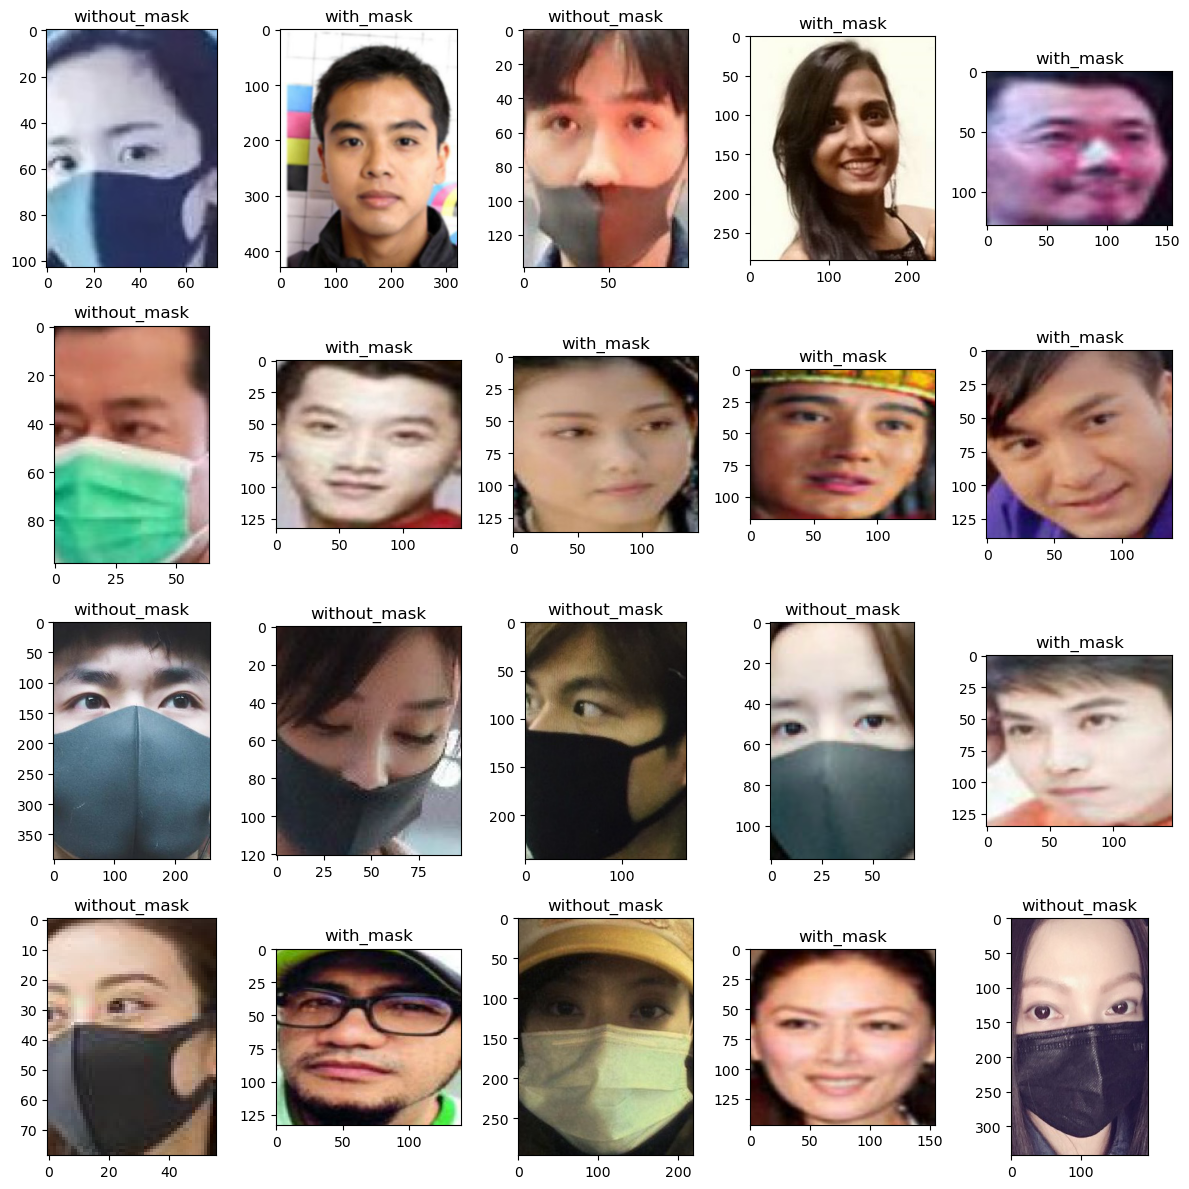

In [15]:
# plot image
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
# plt.title(label[i])
    if label[i] == 1:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.tight_layout()

In [16]:
# train resize 

xtrain =[]
for i in image:
    xtrain.append(resize(i,(64,64,3)))
xtrain =np.array(xtrain)

In [17]:
# test resize

xtest =[]
for i in image_test:
    xtest.append(resize(i,(64,64,3)))
xtest =np.array(xtest)

In [18]:
ytrain = np.array(label)
ytest = np.array(label_test)

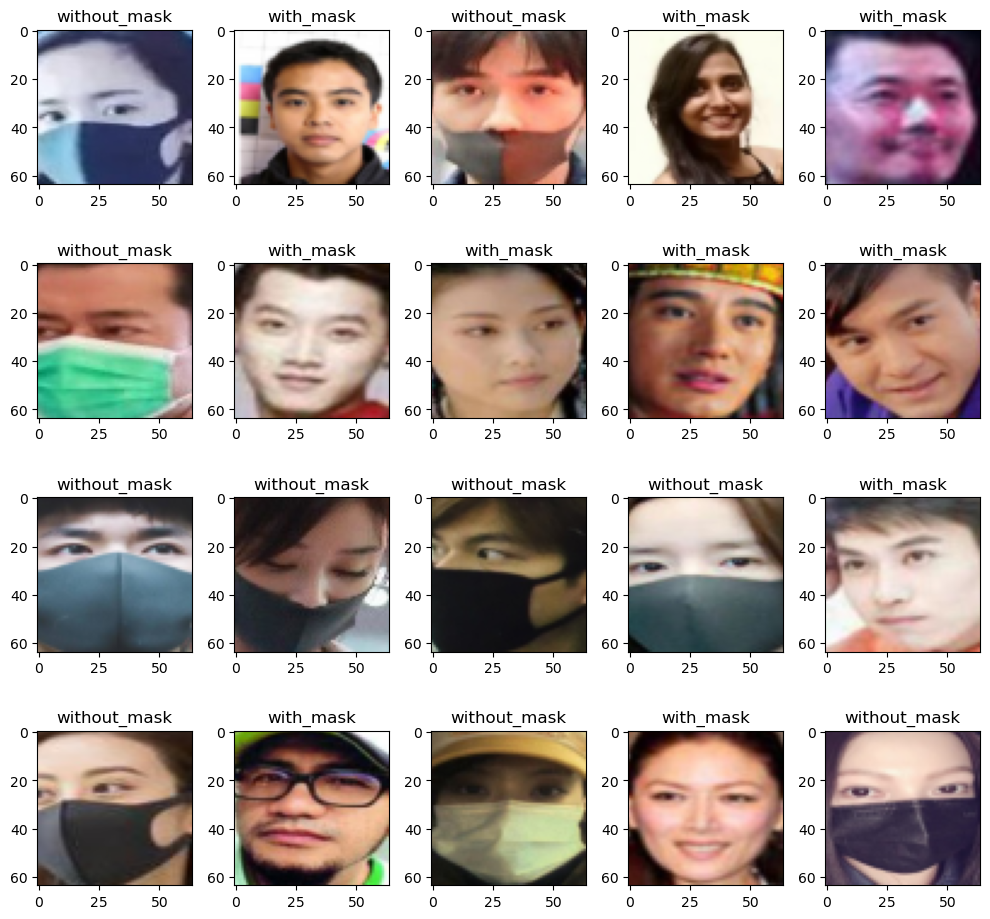

In [19]:
# plot image
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtrain[i])
# plt.title(label[i])
    if label[i] == 1:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.tight_layout()

In [20]:
# CNN Model
model = keras.models.Sequential([
        keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(32,(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),                    
        keras.layers.Dense(1,activation= 'sigmoid')
])

C:\RESHMA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(xtrain,ytrain,epochs=5,validation_split=0.1)

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6986 - loss: 0.6110 - val_accuracy: 0.9226 - val_loss: 0.2336
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9130 - loss: 0.2415 - val_accuracy: 0.9370 - val_loss: 0.1835
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9262 - loss: 0.1982 - val_accuracy: 0.9427 - val_loss: 0.1539
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9423 - loss: 0.1738 - val_accuracy: 0.9484 - val_loss: 0.1236
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9358 - loss: 0.1667 - val_accuracy: 0.9599 - val_loss: 0.1152


In [24]:
model.evaluate(xtrain,ytrain)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9487 - loss: 0.1373


[0.13575325906276703, 0.94925457239151]

In [25]:
# prediction 
prediction = model.predict(xtest)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [26]:
prediction

array([[0.02541947],
       [0.99417627],
       [0.44075415],
       ...,
       [0.99495375],
       [0.99732345],
       [0.3191888 ]], dtype=float32)

In [27]:
prediction
pred =[]
for i in prediction:
    if i<0.5:
        pred.append(0)
    else:
        pred.append(1)

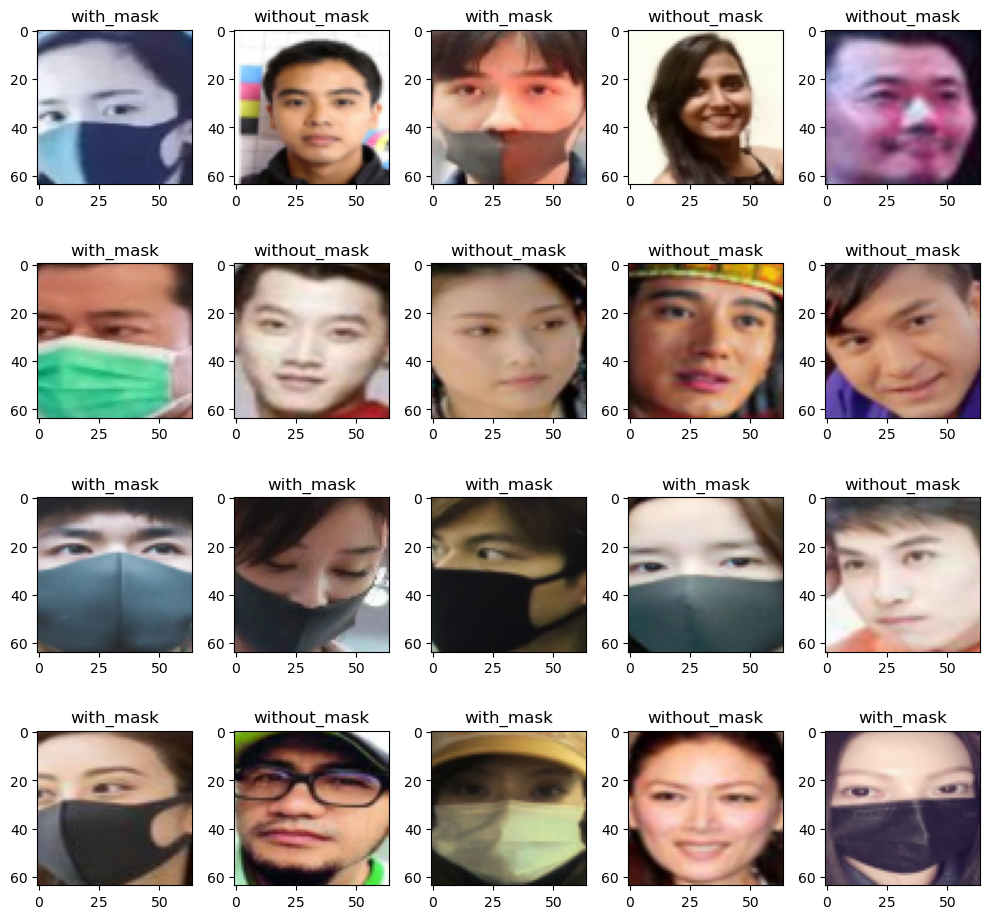

In [28]:
# plot image
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtest[i])
# plt.title(label[i])
    if pred[i] == 0:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.tight_layout()

### Visualize

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [30]:
print(confusion_matrix(ytest,pred))

[[1570  126]
 [  51 1741]]


In [31]:
ytest

array([0, 1, 0, ..., 1, 1, 0])

In [32]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1696
           1       0.93      0.97      0.95      1792

    accuracy                           0.95      3488
   macro avg       0.95      0.95      0.95      3488
weighted avg       0.95      0.95      0.95      3488



In [33]:
accuracy_score(ytest,pred)

0.9492545871559633

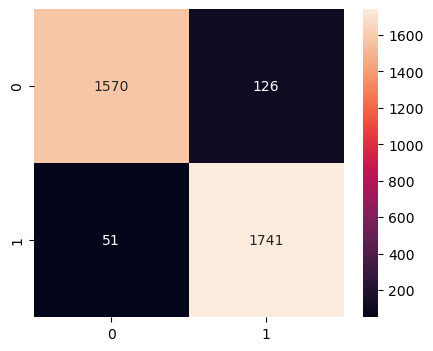

In [34]:
plt.figure(figsize = (5,4))
sns.heatmap(confusion_matrix(ytest, pred), annot = True, fmt = 'd')
plt.show()